In [1]:
# Author: Yinglin Liang
# Title: Linear regression for housing price prediction
# Download from Kaggle: https://www.kaggle.com/yinglin123/linear-regression-for-housing-price-prediction?scriptVersionId=16429436

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['train.csv', 'sample_submission.csv', 'test.csv', 'data_description.txt']


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
df_train = pd.read_csv('../input/train.csv')

df_test = pd.read_csv('../input/test.csv')


In [4]:
df_train.drop('Id',axis=1,inplace=True )
id_test = df_test['Id']                      # for submissions


In [5]:
df_test.drop('Id',axis=1,inplace=True )


In [6]:
df_train.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
df_train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [8]:
row_train=df_train.shape[0]
row_test=df_test.shape[0]

In [9]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

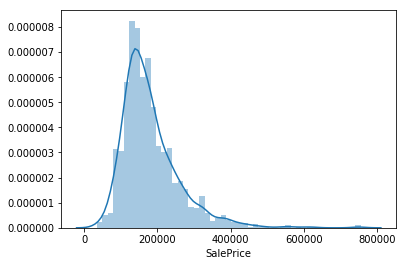

In [10]:
sns.distplot(df_train['SalePrice'])

Seperate characteristic and numeric variables

In [11]:
# for numeric variable
df_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0


In [12]:
# for categrocial variables
df_train.describe(include = ['O']).transpose()

,count,unique,top,freq
MSZoning,1460,5,RL,1151
Street,1460,2,Pave,1454
Alley,91,2,Grvl,50
LotShape,1460,4,Reg,925
LandContour,1460,4,Lvl,1311
Utilities,1460,2,AllPub,1459
LotConfig,1460,5,Inside,1052
LandSlope,1460,3,Gtl,1382
Neighborhood,1460,25,NAmes,225
Condition1,1460,9,Norm,1260


In [13]:
cols = df_train.select_dtypes([np.number]).columns
print(cols)

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


In [14]:
num_df=df_train[cols]
num_df.head(5)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


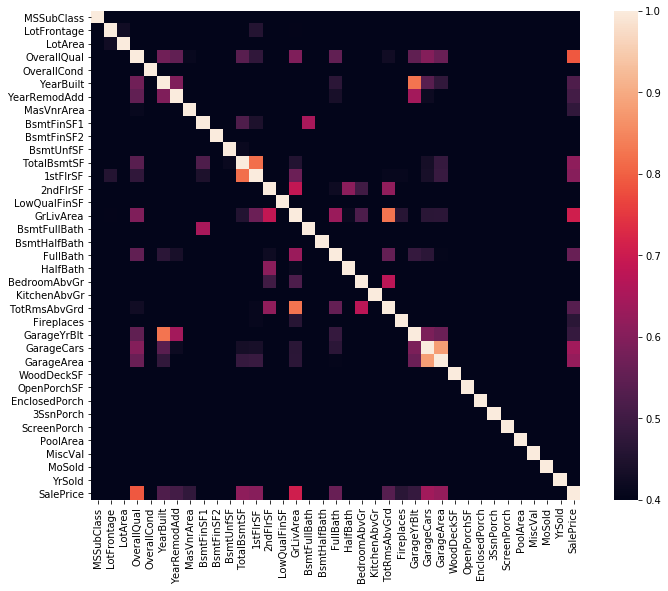

In [15]:
corrmat = num_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=1, vmin=0.4, square=True);

From the heatmap, see OverallQual, YearBuilt, YearRemodAdd,TotalBsmtSF, 1stFlrSF，GrLivArea, FullBath, TotRmsAbvGrd, GarageCars, GarageArea 

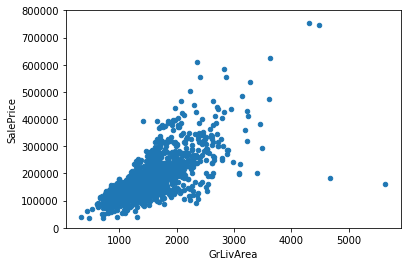

In [16]:
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [17]:
outliers_GrLivArea = df_train.loc[(df_train['GrLivArea']>4500.0)]
outliers_GrLivArea[['OverallQual','GrLivArea' , 'SalePrice']]
outliers=[524,1299]
df_train = df_train.drop(df_train.index[outliers])


house 524 and 1299 are outliers with really big area and low salesprice

Select catogorical varables based on business sense. //
House type:MSSubClass//
Surrouding conditions: MSZoning, Neighborhood//
House appearance: LotConfig//
House Facility: HeatingQC, KitchenQual, FireplaceQu, GarageType//
House Quality: OverallQual


Check missing value

In [18]:
df_train1=df_train[['MSSubClass','YearBuilt','YearRemodAdd','TotalBsmtSF','1stFlrSF','GrLivArea','FullBath','TotRmsAbvGrd','GarageCars', 
          'GarageArea','MSSubClass','MSZoning', 'Neighborhood','LotConfig',
'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageType','OverallQual']]

In [19]:
total = df_train1.isnull().sum().sort_values(ascending=False)
percent = (df_train1.isnull().sum()/df_train1.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
FireplaceQu,689,0.472565
GarageType,81,0.055556
OverallQual,0,0.000000
TotRmsAbvGrd,0,0.000000
YearBuilt,0,0.000000
YearRemodAdd,0,0.000000
TotalBsmtSF,0,0.000000
1stFlrSF,0,0.000000
GrLivArea,0,0.000000
FullBath,0,0.000000


Good news! The features that I select don't have too much missing values.

In [20]:
#fill train na
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond','BsmtQual',
            'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',"PoolQC"
           ,'Alley','Fence','MiscFeature','FireplaceQu','MasVnrType','Utilities']:
    df_train[col] = df_train[col].fillna('None')

for col in ('GarageYrBlt', 'GarageArea', 'GarageCars','MasVnrArea','BsmtFinSF1','BsmtFinSF2'
           ,'BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BsmtUnfSF','TotalBsmtSF'):
    df_train[col] = df_train[col].fillna(0)

# group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
df_train['LotFrontage'] = df_train.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [21]:
# fill test set na
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond','BsmtQual',
            'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',"PoolQC"
           ,'Alley','Fence','MiscFeature','FireplaceQu','MasVnrType','Utilities']:
    df_test[col] = df_test[col].fillna('None')
    
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars','MasVnrArea','BsmtFinSF1','BsmtFinSF2'
           ,'BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BsmtUnfSF','TotalBsmtSF'):
    df_test[col] = df_test[col].fillna(0)

df_test['LotFrontage'] = df_test.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

df_test['MSZoning'] = df_test['MSZoning'].fillna('RL')
df_test['KitchenQual'] = df_test['KitchenQual'].fillna(df_test['KitchenQual'].mode()[0])


In [22]:
df_train['GarageYrBlt'] = df_train['GarageYrBlt'].fillna(df_train['YearBuilt'])

In [23]:
# fill test set na
df_test['GarageYrBlt'] = df_test['GarageYrBlt'].fillna(df_test['YearBuilt'])

In [24]:
#check train na
total0 = df_train.isnull().sum().sort_values(ascending=False)
percent0 = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data0 = pd.concat([total0, percent0], axis=1, keys=['Total0', 'Percent0'])
missing_data0.head(20)

,Total0,Percent0
Electrical,1,0.000686
SalePrice,0,0.000000
Foundation,0,0.000000
RoofMatl,0,0.000000
Exterior1st,0,0.000000
Exterior2nd,0,0.000000
MasVnrType,0,0.000000
MasVnrArea,0,0.000000
ExterQual,0,0.000000
ExterCond,0,0.000000


In [25]:
#check test na
total1 = df_test.isnull().sum().sort_values(ascending=False)
percent1 = (df_test.isnull().sum()/df_test.isnull().count()).sort_values(ascending=False)
missing_data1 = pd.concat([total1, percent1], axis=1, keys=['Total1', 'Percent1'])
missing_data1.head(20)

,Total1,Percent1
Functional,2,0.001371
SaleType,1,0.000685
Exterior1st,1,0.000685
Exterior2nd,1,0.000685
TotalBsmtSF,0,0.000000
RoofMatl,0,0.000000
MasVnrType,0,0.000000
MasVnrArea,0,0.000000
ExterQual,0,0.000000
ExterCond,0,0.000000


Create new variable

In [26]:
df_train['remod'] = np.where(df_train['YearBuilt']==df_train['YearRemodAdd'],0,1)
df_train['age']=df_train['YrSold']-df_train['YearRemodAdd']
df_train['new']=np.where(df_train['YrSold']==df_train['YearBuilt'],0,1) # is new house?
df_train['TotalBath']=df_train['BsmtFullBath']+0.5*df_train['BsmtHalfBath']+df_train['FullBath']+0.5*df_train['HalfBath']
df_train['TotalSqFeet']=df_train['GrLivArea']+df_train['TotalBsmtSF']
df_train['TotalPorchSF']=df_train['OpenPorchSF']+df_train['EnclosedPorch']+df_train['3SsnPorch']+df_train['ScreenPorch']

In [27]:
df_test['remod'] = np.where(df_test['YearBuilt']==df_test['YearRemodAdd'],0,1)
df_test['age']=df_test['YrSold']-df_test['YearRemodAdd']
df_test['new']=np.where(df_test['YrSold']==df_test['YearBuilt'],0,1) # is new house?
df_test['TotalBath']=df_test['BsmtFullBath']+0.5*df_test['BsmtHalfBath']+df_test['FullBath']+0.5*df_test['HalfBath']
df_test['TotalSqFeet']=df_test['GrLivArea']+df_test['TotalBsmtSF']
df_test['TotalPorchSF']=df_test['OpenPorchSF']+df_test['EnclosedPorch']+df_test['3SsnPorch']+df_test['ScreenPorch']

In [28]:
#df_test['TotalBath'] = df_test['TotalBath'].fillna(0.0)
#df_test['TotalSqFeet'] = df_test['TotalSqFeet'].fillna(0.0)

run heatmap again

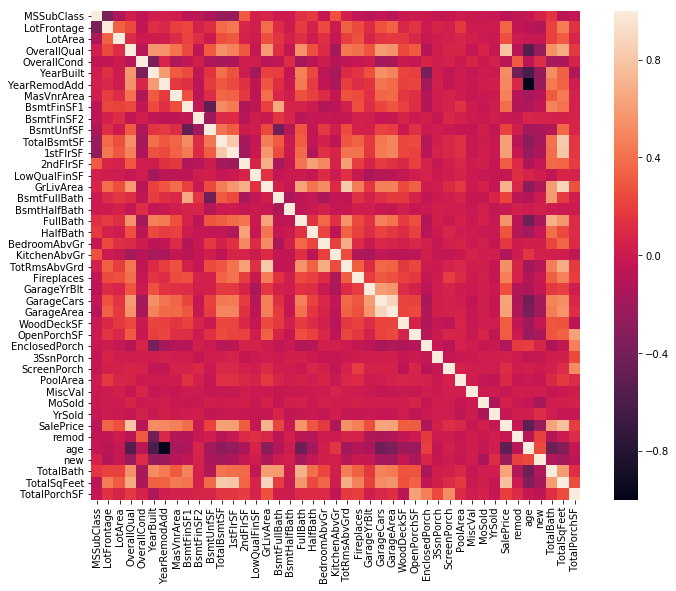

In [29]:
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=1, square=True);

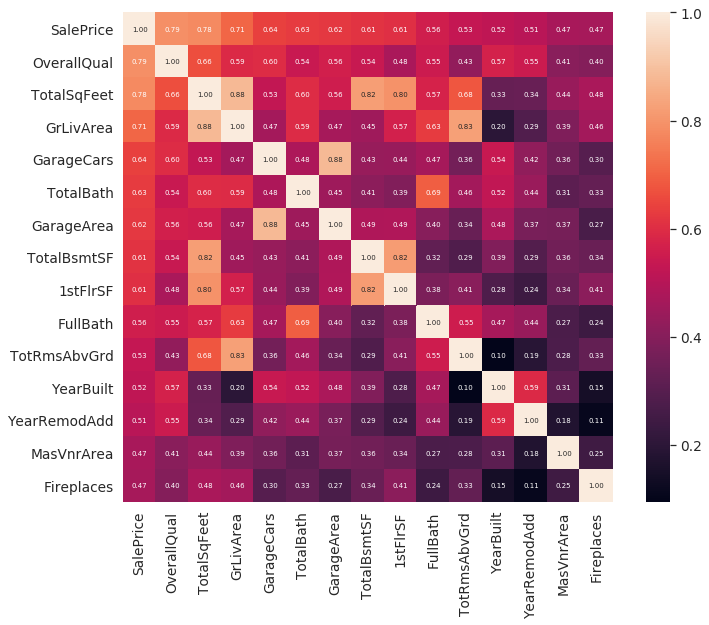

In [30]:
corr_num = 15 #number of variables for heatmap
cols_corr = corrmat.nlargest(corr_num, 'SalePrice')['SalePrice'].index
corr_mat_sales = np.corrcoef(df_train[cols_corr].values.T)
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(12, 9))
hm = sns.heatmap(corr_mat_sales, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 7}, yticklabels=cols_corr.values, xticklabels=cols_corr.values)
plt.show()

In [31]:
#num_df1=df_train[[, 
              #  , , ,'age',',','TotalPorchSF']]

In [32]:
#'OverallQual','TotalSqFeet','GrLivArea','GarageCars','TotalBath','GarageArea','TotalBsmtSF', '1stFlrSF', 'FullBath','YearBuilt',
#'GarageYrBlt','YearRemodAdd','TotRmsAbvGrd'

Log transformation of SalePrice

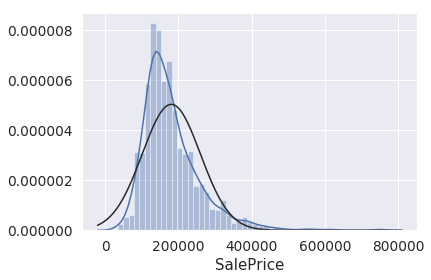

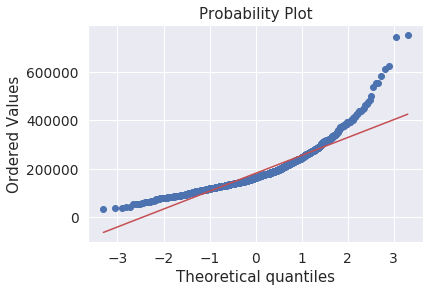

In [33]:
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

In [34]:
df_train['SalePrice'] = np.log(df_train['SalePrice'])

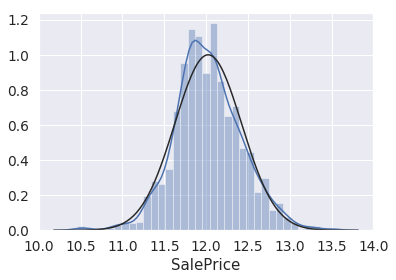

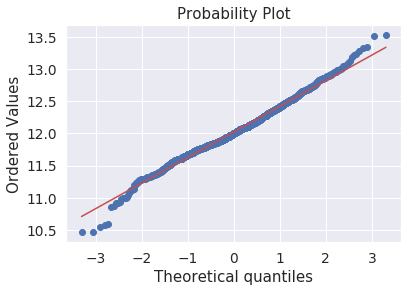

In [35]:
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

Model 1

In [36]:
X_train=df_train[['OverallQual', 'GrLivArea', 'TotalSqFeet', 'GarageCars','TotalBath','GarageArea','TotalBsmtSF',
'1stFlrSF','FullBath','YearBuilt','MSSubClass','MSZoning','Neighborhood','LotConfig','YearRemodAdd','TotRmsAbvGrd',
'HeatingQC','KitchenQual','FireplaceQu','OverallQual']]
y_train=df_train['SalePrice']

In [37]:

X_test=df_test[['OverallQual', 'GrLivArea', 'TotalSqFeet', 'GarageCars','TotalBath','GarageArea','TotalBsmtSF',
'1stFlrSF','FullBath','YearBuilt','MSSubClass','MSZoning','Neighborhood','LotConfig','YearRemodAdd','TotRmsAbvGrd',
'HeatingQC','KitchenQual','FireplaceQu','OverallQual']]

In [38]:
#check final feature train set na

total2 = X_train.isnull().sum().sort_values(ascending=False)
percent2 = (X_train.isnull().sum()/X_train.isnull().count()).sort_values(ascending=False)
missing_data2 = pd.concat([total2, percent2], axis=1, keys=['Total2', 'Percent2'])
missing_data2.head(20)

,Total2,Percent2
OverallQual,0,0.0
FireplaceQu,0,0.0
GrLivArea,0,0.0
TotalSqFeet,0,0.0
GarageCars,0,0.0
TotalBath,0,0.0
GarageArea,0,0.0
TotalBsmtSF,0,0.0
1stFlrSF,0,0.0
FullBath,0,0.0


In [39]:
#check final feature test set na
total3 = X_test.isnull().sum().sort_values(ascending=False)
percent3 = (X_test.isnull().sum()/X_test.isnull().count()).sort_values(ascending=False)
missing_data3 = pd.concat([total3, percent3], axis=1, keys=['Total3', 'Percent3'])
missing_data3.head(20)

,Total3,Percent3
OverallQual,0,0.0
FireplaceQu,0,0.0
GrLivArea,0,0.0
TotalSqFeet,0,0.0
GarageCars,0,0.0
TotalBath,0,0.0
GarageArea,0,0.0
TotalBsmtSF,0,0.0
1stFlrSF,0,0.0
FullBath,0,0.0


In [40]:
#convert numeric to string
str_vars = ['MSSubClass','YrSold','MoSold']
for var in str_vars:
    df_train[var] = df_train[var].apply(str)
    df_test[var] = df_test[var].apply(str)

In [41]:
#one hot encoding
X_train1 = pd.get_dummies(data=X_train, drop_first=True)
X_train1.head(5)

,OverallQual,GrLivArea,TotalSqFeet,GarageCars,TotalBath,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,YearBuilt,MSSubClass,YearRemodAdd,TotRmsAbvGrd,OverallQual,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA
0,7,1710,2566,2,3.5,548,856,856,2,2003,60,2003,8,7,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
1,6,1262,2524,2,2.5,460,1262,1262,2,1976,20,1976,6,6,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,7,1786,2706,2,3.5,608,920,920,2,2001,60,2002,6,7,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
3,7,1717,2473,3,2.0,642,756,961,1,1915,70,1970,7,7,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0
4,8,2198,3343,3,3.5,836,1145,1145,2,2000,60,2000,9,8,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [42]:
X_test1 = pd.get_dummies(data=X_test, drop_first=True)

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, make_scorer
#lr = LinearRegression()
#lr.fit(X_train1, y_train)



In [44]:
from sklearn.model_selection import cross_val_score, train_test_split
scorer = make_scorer(mean_squared_error, greater_is_better = False)

def rmse_cv_train(model):
    rmse= np.sqrt(-cross_val_score(model, X_train1, y_train, scoring = scorer, cv = 10))
    return(rmse)

In [45]:
#lasso regression
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.pipeline import make_pipeline

In [46]:
lr = LinearRegression()

In [47]:
kfolds = KFold(n_splits=10, shuffle=True, random_state=42)
alphas2 = [0.0001, 0.0002, 0.0003, 0.0005, 0.0006, 0.0007]
lasso = make_pipeline(RobustScaler(), LassoCV(max_iter=1e7, 
                    alphas=alphas2,random_state=42, cv=kfolds))

In [48]:
alphas_alt = [14.6, 14.7,15, 15.1, 15.3, 15.4]
ridge = make_pipeline(RobustScaler(), RidgeCV(alphas=alphas_alt, cv=kfolds))

In [49]:
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]
elastic = make_pipeline(RobustScaler(), ElasticNetCV(max_iter=1e7, 
                         alphas=e_alphas, cv=kfolds, l1_ratio=e_l1ratio))

In [50]:
import lightgbm as lgb
from lightgbm import LGBMRegressor

lgbm = LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [51]:
# store models, scores and prediction values 
models = {'Ridge': ridge,
          'Lasso': lasso, 
          'Linear regression':lr
#          'ElasticNet': elasticnet}
#           'lightgbm': lightgbm,
#           'xgboost': xgboost}
         }
predictions = {}
scores = {}

Train model

In [52]:
# model scoring and validation function
def cv_rmse(model, X_train1=X_train1):
    rmse = np.sqrt(-cross_val_score(model, X_train1, y_train, scoring="neg_mean_squared_error",cv=kfolds))
    return (rmse)

# rmsle scoring function
def rmsle(y_train, y_train_pred):
    return np.sqrt(mean_squared_error(y_train, y_train_pred))

In [53]:
for name, model in models.items():
    
    model.fit(X_train1, y_train)
    predictions[name] = np.expm1(model.predict(X_train1))
    
    score = cv_rmse(model, X_train1)
    scores[name] = (score.mean(), score.std())

In [54]:
# get the performance of each model on training data(validation set)
print('---- Score with CV_RMSLE-----')
score = cv_rmse(lr)
print("Linear regression score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = cv_rmse(ridge)
print("Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = cv_rmse(lasso)
print("Lasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = cv_rmse(elastic)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = cv_rmse(lgbm)
print("lgbm score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

---- Score with CV_RMSLE-----
Linear regression score: 0.1483 (0.0264)

Ridge score: 0.1498 (0.0280)

Lasso score: 0.1481 (0.0270)

ElasticNet score: 0.1482 (0.0269)

lgbm score: 0.1367 (0.0129)



In [55]:

lgbm_fit = lgbm.fit(X_train1, y_train)
y_test_pred = lgbm_fit.predict(X_test1)


In [56]:
#y_test_pred = lgbm_model_fit.predict(X_test1)

In [57]:
#Inverse Logtransforming using np.expm1
y_test_pred_final=np.expm1(y_test_pred)
y_test_pred_final



array([112840.06830515, 143531.79495601, 169771.35330207, ...,
       157801.93088739, 117424.69399197, 214979.95145221])

my submission

In [58]:
len(y_test_pred_final)


1459

In [59]:
df_test.shape

(1459, 85)

In [60]:
my_submission = pd.DataFrame({'Id': id_test, 'SalePrice': y_test_pred_final})
# you could use any filename. We choose submission here
my_submission.to_csv('submission.csv', index=False)